# ***`CLASS_ACTIVITY_02`***

*`Name of the Dataset:`*  

 'insurance.csv' file

*`About the Dataset:`*  

The dataset under analysis pertains to health insurance costs, capturing key personal attributes of individuals that are typically influential in determining insurance premiums. These attributes include age, sex, Body Mass Index (BMI), number of children (as dependents), smoking status, and geographical region. The primary objective of analyzing this dataset is to understand the factors that most significantly impact insurance charges, enabling the development of predictive models for insurance cost estimation. The insights derived from this dataset are crucial for insurance companies to set premiums and for individuals to understand the determinants of their insurance expenses. As such, it serves as a valuable resource for both actuarial analysis and personal financial planning in the context of health 


---

- Import libraries

In [41]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as pyplot

- Load Dataset

In [2]:


# Load the dataset

data = pd.read_csv(r"D:\DS\ML\insurance.csv", encoding='latin-1')

# Display the first few rows of the dataset to understand its structure
data.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


--- 

## Data Preprocessing:
- Handle missing or anomalous data.
- Convert categorical variables (sex, smoker, region) into numerical formats using 
encoding techniques (e.g., one-hot encoding).


In [3]:
# Check for missing values in the dataset
missing_values = data.isnull().sum()

# Check for any obvious anomalies in the data (e.g., negative values where they don't make sense)
anomalies = {
    "age": (data['age'] < 0).sum(),
    "bmi": (data['bmi'] < 0).sum(),
    "children": (data['children'] < 0).sum(),
    "charges": (data['charges'] < 0).sum()
}

missing_values, anomalies


(age         0
 sex         0
 bmi         0
 children    0
 smoker      0
 region      0
 charges     0
 dtype: int64,
 {'age': 0, 'bmi': 0, 'children': 0, 'charges': 0})

- Normalized

In [4]:
from sklearn.preprocessing import OneHotEncoder

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=False, drop='first')  # 'drop=first' to avoid multicollinearity

# Selecting the categorical columns for encoding
categorical_columns = ['sex', 'smoker', 'region']
encoded_data = encoder.fit_transform(data[categorical_columns])

# Create a DataFrame with the encoded columns
encoded_columns = encoder.get_feature_names_out(categorical_columns)
encoded_df = pd.DataFrame(encoded_data, columns=encoded_columns)

# Drop the original categorical columns and concatenate the new encoded columns
data_encoded = data.drop(categorical_columns, axis=1)
data_encoded = pd.concat([data_encoded, encoded_df], axis=1)

# Display the first few rows of the updated dataset
data_encoded.head()


c:\Users\HP\miniconda3\envs\python_ml\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0.0,1.0,0.0,0.0,1.0
1,18,33.770,1,1725.55230,1.0,0.0,0.0,1.0,0.0
2,28,33.000,3,4449.46200,1.0,0.0,0.0,1.0,0.0
3,33,22.705,0,21984.47061,1.0,0.0,1.0,0.0,0.0
4,32,28.880,0,3866.85520,1.0,0.0,1.0,0.0,0.0


- standardize

In [5]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Selecting the numerical columns for standardization
numerical_columns = ['age', 'bmi', 'children', 'charges']
data_encoded[numerical_columns] = scaler.fit_transform(data_encoded[numerical_columns])

# Display the first few rows of the standardized dataset
data_encoded.head()


,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,-1.438764,-0.453320,-0.908614,0.298584,0.0,1.0,0.0,0.0,1.0
1,-1.509965,0.509621,-0.078767,-0.953689,1.0,0.0,0.0,1.0,0.0
2,-0.797954,0.383307,1.580926,-0.728675,1.0,0.0,0.0,1.0,0.0
3,-0.441948,-1.305531,-0.908614,0.719843,1.0,0.0,1.0,0.0,0.0
4,-0.513149,-0.292556,-0.908614,-0.776802,1.0,0.0,1.0,0.0,0.0


---

## Exploratory Data Analysis (EDA):
- Analyze the distribution of key variables (e.g., age, bmi, charges).

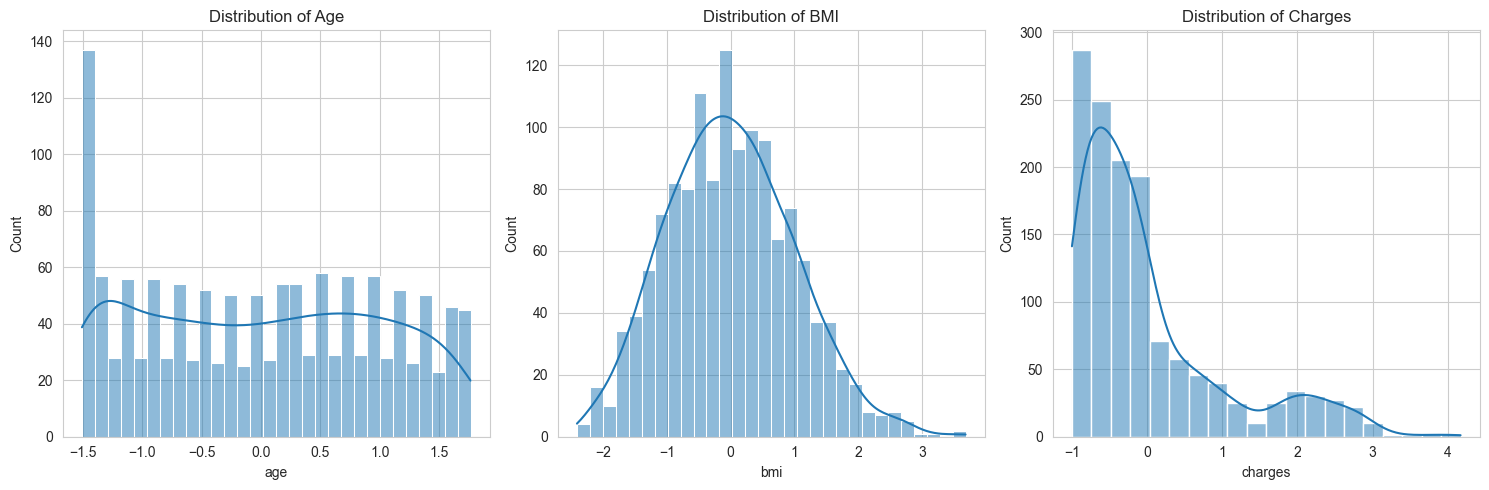

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Exploratory Data Analysis (EDA)

# 1. Analyze the distribution of key variables: 'age', 'bmi', 'charges'
plt.figure(figsize=(15, 5))

# Distribution of 'age'
plt.subplot(1, 3, 1)
sns.histplot(data_encoded['age'], bins=30, kde=True)
plt.title('Distribution of Age')

# Distribution of 'bmi'
plt.subplot(1, 3, 2)
sns.histplot(data_encoded['bmi'], bins=30, kde=True)
plt.title('Distribution of BMI')

# Distribution of 'charges'
plt.subplot(1, 3, 3)
sns.histplot(data_encoded['charges'], bins=20, kde=True)
plt.title('Distribution of Charges')

plt.tight_layout()
plt.show()




- Investigate relationships between features and the target variable (charges).

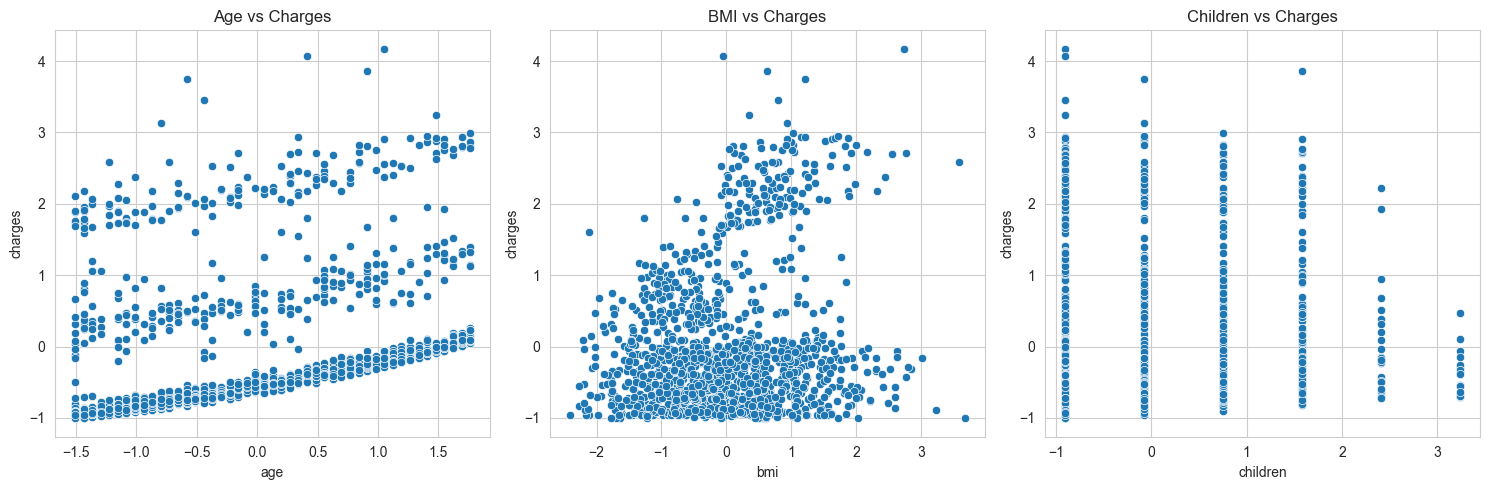

In [7]:
# 2. Investigate relationships between features and the target variable ('charges')
plt.figure(figsize=(15, 5))

# Relationship between 'age' and 'charges'
plt.subplot(1, 3, 1)
sns.scatterplot(x='age', y='charges', data=data_encoded)
plt.title('Age vs Charges')

# Relationship between 'bmi' and 'charges'
plt.subplot(1, 3, 2)
sns.scatterplot(x='bmi', y='charges', data=data_encoded)
plt.title('BMI vs Charges')

# Relationship between 'children' and 'charges'
plt.subplot(1, 3, 3)
sns.scatterplot(x='children', y='charges', data=data_encoded)
plt.title('Children vs Charges')

plt.tight_layout()
plt.show()


- Identify potential outliers or influential points.

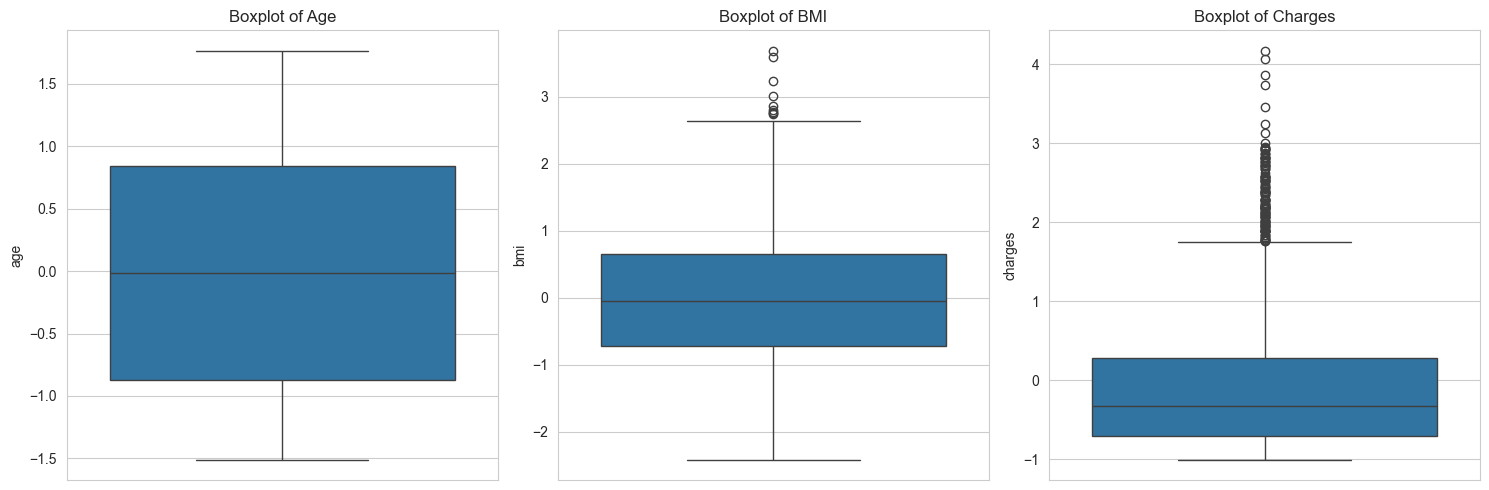

In [8]:

# 3. Identify potential outliers or influential points
# Boxplots for 'age', 'bmi', 'charges' to identify outliers
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(y=data_encoded['age'])
plt.title('Boxplot of Age')

plt.subplot(1, 3, 2)
sns.boxplot(y=data_encoded['bmi'])
plt.title('Boxplot of BMI')

plt.subplot(1, 3, 3)
sns.boxplot(y=data_encoded['charges'])
plt.title('Boxplot of Charges')

plt.tight_layout()
plt.show()

--- 

- now handle the outliners so model can work more accurately 

In [10]:
def detect_outliers(df, feature):
    """
    Function to detect outliers using the IQR method.
    Outliers are values that fall below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR.
    """
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    outlier_indices = df[(df[feature] < (Q1 - 1.5 * IQR)) | (df[feature] > (Q3 + 1.5 * IQR))].index
    return outlier_indices

# Detecting outliers in 'bmi' and 'charges'
bmi_outliers = detect_outliers(data_encoded, 'bmi')
charges_outliers = detect_outliers(data_encoded, 'charges')

# Number of outliers in each feature
num_bmi_outliers = len(bmi_outliers)
num_charges_outliers = len(charges_outliers)

num_bmi_outliers, num_charges_outliers


(9, 139)

c:\Users\HP\miniconda3\envs\python_ml\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


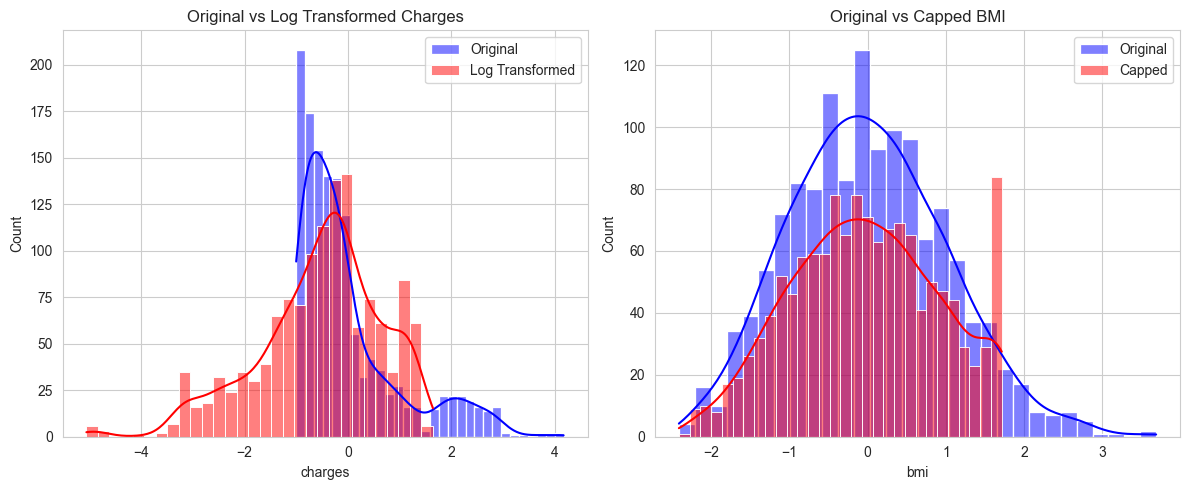

In [11]:
import numpy as np

# Logarithmic transformation of the 'charges' feature
data_encoded['charges_log'] = np.log(data_encoded['charges'] + 1)  # Adding 1 to avoid log(0)

# Capping the outliers in 'bmi'
bmi_upper_bound = data_encoded['bmi'].quantile(0.95)  # 95th percentile
data_encoded['bmi_capped'] = np.where(data_encoded['bmi'] > bmi_upper_bound, bmi_upper_bound, data_encoded['bmi'])

# Visualizing the transformed distributions
plt.figure(figsize=(12, 5))

# Original vs Transformed 'charges'
plt.subplot(1, 2, 1)
sns.histplot(data_encoded['charges'], bins=30, kde=True, color='blue', label='Original')
sns.histplot(data_encoded['charges_log'], bins=30, kde=True, color='red', label='Log Transformed')
plt.title('Original vs Log Transformed Charges')
plt.legend()

# Original vs Capped 'bmi'
plt.subplot(1, 2, 2)
sns.histplot(data_encoded['bmi'], bins=30, kde=True, color='blue', label='Original')
sns.histplot(data_encoded['bmi_capped'], bins=30, kde=True, color='red', label='Capped')
plt.title('Original vs Capped BMI')
plt.legend()

plt.tight_layout()
plt.show()


--- 

## Model Development:
- Split the dataset into training and testing sets.  

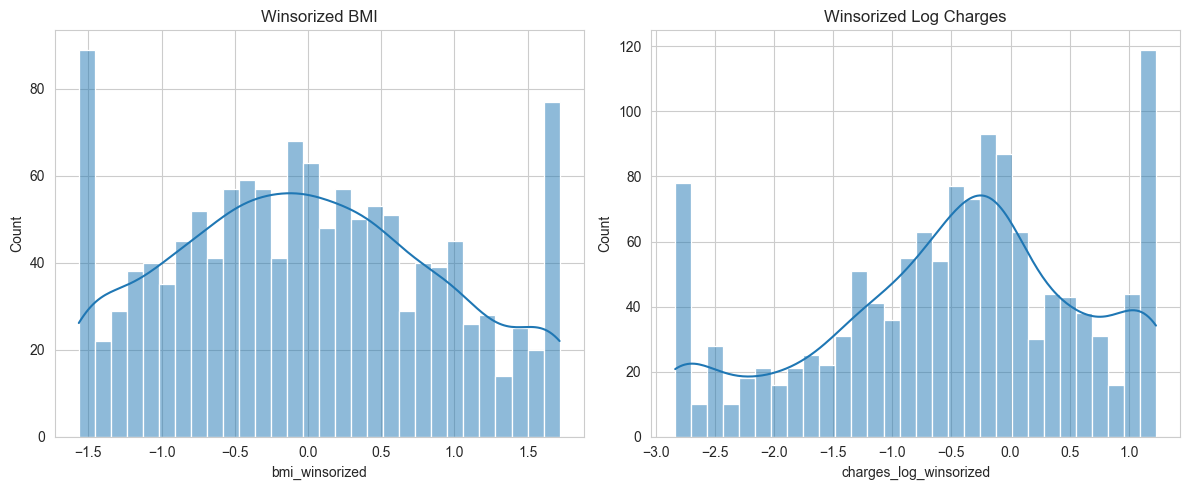

(0.3742716769186506, 0.7187653665558094)

In [14]:
from scipy.stats import mstats

# Winsorizing the 'bmi' and 'charges' features
# Replacing outliers in the upper and lower 5% with the 5th and 95th percentile values respectively
data_encoded['bmi_winsorized'] = mstats.winsorize(data_encoded['bmi'], limits=[0.05, 0.05])
data_encoded['charges_log_winsorized'] = mstats.winsorize(data_encoded['charges_log'], limits=[0.05, 0.05])

# Visualizing the winsorized distributions
plt.figure(figsize=(12, 5))

# Winsorized 'bmi'
plt.subplot(1, 2, 1)
sns.histplot(data_encoded['bmi_winsorized'], bins=30, kde=True)
plt.title('Winsorized BMI')

# Winsorized 'charges_log'
plt.subplot(1, 2, 2)
sns.histplot(data_encoded['charges_log_winsorized'], bins=30, kde=True)
plt.title('Winsorized Log Charges')

plt.tight_layout()
plt.show()

# Preparing the data for modeling with the winsorized features
X_winsorized = data_encoded.drop(['charges', 'charges_log', 'bmi', 'bmi_capped', 'bmi_winsorized', 'charges_log_winsorized'], axis=1)
y_winsorized = data_encoded['charges_log_winsorized']

# Splitting the dataset into training and testing sets
X_train_winsorized, X_test_winsorized, y_train_winsorized, y_test_winsorized = train_test_split(X_winsorized, y_winsorized, test_size=0.2, random_state=42)

# Implementing a linear regression model with the winsorized data
linear_model_winsorized = LinearRegression()
linear_model_winsorized.fit(X_train_winsorized, y_train_winsorized)

# Predicting on the test set
y_pred_winsorized = linear_model_winsorized.predict(X_test_winsorized)

# Evaluating model performance with the winsorized data
mse_winsorized = mean_squared_error(y_test_winsorized, y_pred_winsorized)
r2_winsorized = r2_score(y_test_winsorized, y_pred_winsorized)

mse_winsorized, r2_winsorized


In [18]:
from sklearn.preprocessing import RobustScaler

# Initialize the RobustScaler
robust_scaler = RobustScaler()


In [19]:
pip install -U scikit-learn


Note: you may need to restart the kernel to use updated packages.


- Split the Dataset:

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'data_encoded' is your prepared dataset
X = data_encoded.drop(['charges', 'charges_log'], axis=1)  # Exclude target variable
y = data_encoded['charges_log']  # Target variable

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


- Implement a Linear Regression Model:

In [28]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)


ValueError: Input y contains NaN.

- Evaluate Model Performance:

In [23]:
y_pred = linear_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


AttributeError: 'LinearRegression' object has no attribute 'coef_'

In [24]:
print("Mean Squared Error:", mse)
print("R-squared:", r2)


NameError: name 'mse' is not defined

Check for NaN Values in the Target Variable:

In [25]:
nan_in_target = y.isna().sum()
print("Number of NaN values in target variable:", nan_in_target)


Number of NaN values in target variable: 10


Remove Rows with NaN in Target Variable:

In [26]:
if nan_in_target > 0:
    # Filter out rows where the target variable is NaN
    data_non_nan = data_encoded.dropna(subset=['charges_log'])  # replace 'charges_log' with your actual target variable name
    X_non_nan = data_non_nan.drop(['charges', 'charges_log'], axis=1)  # Adjust column names as per your dataset
    y_non_nan = data_non_nan['charges_log']  # replace 'charges_log' with your actual target variable name

    # Split the data without NaN values
    X_train_non_nan, X_test_non_nan, y_train_non_nan, y_test_non_nan = train_test_split(X_non_nan, y_non_nan, test_size=0.2, random_state=42)


Proceed with Model Training:

In [27]:
# Check the number of NaN values in the target variable 'y'
nan_in_target = y.isna().sum()

# If the number of NaNs is not significant, we can remove these rows
if nan_in_target > 0:
    # Removing rows where the target variable is NaN
    data_cleaned = data_encoded.dropna(subset=['charges_log'])
    X_cleaned = data_cleaned.drop(['charges', 'charges_log'], axis=1)
    y_cleaned = data_cleaned['charges_log']

    # Split the cleaned data
    X_train_cleaned, X_test_cleaned, y_train_cleaned, y_test_cleaned = train_test_split(X_cleaned, y_cleaned, test_size=0.2, random_state=42)
else:
    # If no NaNs, use the original split
    X_train_cleaned, X_test_cleaned, y_train_cleaned, y_test_cleaned = X_train, X_test, y_train, y_test

nan_in_target, X_train_cleaned.shape, X_test_cleaned.shape, y_train_cleaned.shape, y_test_cleaned.shape


(10, (1062, 11), (266, 11), (1062,), (266,))

## Now resolve the above error 

- Step 1: Prepare the Data

In [29]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming your dataset is loaded into a DataFrame named 'data'
data['charges_log'] = np.log(data['charges'])

# Preparing features and target variable
X = data.drop(['charges', 'charges_log'], axis=1)  # Replace 'charges' with the original target variable if different
y = data['charges_log']


- Step 2: Split the Data

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


- Step 3: Implement the Linear Regression Model

In [31]:
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


ValueError: could not convert string to float: 'female'

## Try to solve this error :

in this we convert the female column that is string into numerical because of linear regression.

Theses are the following steps that i can follow to resolve this issue.

Step 1: Encode Categorical Variables

In [32]:
data = pd.get_dummies(data)


Step 2: Prepare the Data

In [33]:
X = data.drop(['charges', 'charges_log'], axis=1)  # Replace 'charges' with the original target variable if different
y = data['charges_log']


Step 3: Split the Data

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# NOW;
Step 4: Implement the Linear Regression Model

Train the model and make predictions:

In [35]:
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


Step 5: Evaluate the Model

In [36]:
# Calculate R-squared and MSE
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 0.17557416396791647
R-squared: 0.8047311493462987


--- 

# Model Interpretation:

- Retrieve the Coefficients

In [38]:
# Assuming your model is named 'model'
coefficients = model.coef_
features = X_train.columns
coef_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})


 ### Interpret the Coefficients
 - The coefficients represent the change in the log-transformed medical charges for a one-unit increase in the feature, holding all other features constant.

`Positive Coefficient:`    
A positive coefficient indicates that as the feature increases, the log-transformed medical charges are expected to increase. For example, if the coefficient of 'age' is positive, older individuals are expected to have higher charges.

`Negative Coefficient:`  
`Conversely, a negative coefficient suggests that as the feature increases, the log-transformed medical charges are expected to decrease.

`Magnitude of Coefficient: `
The larger the absolute value of the coefficient, the stronger the impact of the feature on the medical charges. However, remember that the features need to be on the same scale for this comparison to be meaningful.

## Discuss the Impact of Different Features
Based on the coefficients, you can discuss how different features impact medical charges:

Features with larger positive coefficients significantly increase medical charges.

Features with larger negative coefficients significantly decrease medical charges.

Features with coefficients close to zero have a minimal impact on medical charges.

`Example:` 

If you find that 'age' has a positive coefficient, it suggests that older individuals tend to have higher medical charges. If 'smoker_yes' (assuming it's a one-hot encoded feature for smoking status) has a high positive coefficient, it indicates that being a smoker is associated with significantly higher medical charges.

Remember, these interpretations are based on the model and the data used. They assume that the model is a good fit for the data and that all relevant confounding factors have been accounted for.

---

# Advanced Analysis (Optional):

- Implement Regularized Linear Models (Ridge, Lasso)
- Ridge Regression:

In [39]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Define a range of alpha values for Ridge Regression
ridge_alphas = np.logspace(-6, 6, 13)

# Grid search to find the best alpha
ridge_cv = GridSearchCV(estimator=Ridge(), param_grid={'alpha': ridge_alphas}, scoring='neg_mean_squared_error', cv=5)
ridge_cv.fit(X_train, y_train)

# Best alpha and corresponding MSE
best_ridge_alpha = ridge_cv.best_params_['alpha']
best_ridge_mse = -ridge_cv.best_score_

print("Best Ridge alpha:", best_ridge_alpha)
print("Best Ridge MSE:", best_ridge_mse)


Best Ridge alpha: 1.0
Best Ridge MSE: 0.2051676404317556


Lasso Regression:

In [40]:
from sklearn.linear_model import Lasso

# Define a range of alpha values for Lasso Regression
lasso_alphas = np.logspace(-6, 6, 13)

# Grid search to find the best alpha
lasso_cv = GridSearchCV(estimator=Lasso(), param_grid={'alpha': lasso_alphas}, scoring='neg_mean_squared_error', cv=5)
lasso_cv.fit(X_train, y_train)

# Best alpha and corresponding MSE
best_lasso_alpha = lasso_cv.best_params_['alpha']
best_lasso_mse = -lasso_cv.best_score_

print("Best Lasso alpha:", best_lasso_alpha)
print("Best Lasso MSE:", best_lasso_mse)


Best Lasso alpha: 1e-05
Best Lasso MSE: 0.2051678697641688


### Conduct a Sensitivity Analysis:

Sensitivity analysis involves varying model inputs to see how these changes affect the model's outputs. It helps in understanding the robustness of the model.

`Example Approach: `

Varying Feature Values:

 Change the values of key features slightly (e.g., within one standard deviation) and observe how the predictions change. Large changes in predictions indicate sensitivity to those features.

Using Different Subsets of Data:

 Train your model on different subsets of the data and compare the model coefficients or performance metrics. Significant variability in results may indicate sensitivity to the data used for training.

---